In [15]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [16]:
N = 25
x = np.random.exponential(1, N)
print('Выборка:', [i for i in x])
print('вариационный ряд:', sorted(x))

Выборка: [1.9376527635980014, 1.4308541673288182, 0.9767009910418476, 0.841468630257785, 0.16480320071042207, 2.074171176502673, 4.251985981807171, 0.7457871331262805, 0.13912944973958843, 0.09384320957701969, 0.8488260684274339, 0.04907140710563667, 0.34688276343945623, 1.1812462154274048, 2.632779659817261, 0.33269931032525407, 2.8927075595098293, 0.06830426683084229, 2.6724627509914107, 0.05272861827195733, 0.03819698157776085, 0.19331375183439056, 2.241278858171878, 0.9196589382301146, 1.1214686330595842]
вариационный ряд: [0.03819698157776085, 0.04907140710563667, 0.05272861827195733, 0.06830426683084229, 0.09384320957701969, 0.13912944973958843, 0.16480320071042207, 0.19331375183439056, 0.33269931032525407, 0.34688276343945623, 0.7457871331262805, 0.841468630257785, 0.8488260684274339, 0.9196589382301146, 0.9767009910418476, 1.1214686330595842, 1.1812462154274048, 1.4308541673288182, 1.9376527635980014, 2.074171176502673, 2.241278858171878, 2.632779659817261, 2.6724627509914107, 

### Пункт а) ###

In [17]:
print('Мода: ', [x[j] for j in range (len(x)) if np.sum(x == x[j]) == max([np.sum(x == x[i]) for i in range (len(x))])])
print('Медиана: ', (sorted(x)[math.ceil(len(x) / 2)] + sorted(x)[math.floor(len(x) / 2)]) / 2)
print('Размах: ', max(x) - min(x))
print('Коэффициент асимметрии: ', len(x)**0.5 * sum([(x[i] - np.mean(x))**3 for i in range(len(x))]) / 
      (sum([(x[i] - np.mean(x))**2 for i in range(len(x))]))**1.5)

Мода:  [1.9376527635980014, 1.4308541673288182, 0.9767009910418476, 0.841468630257785, 0.16480320071042207, 2.074171176502673, 4.251985981807171, 0.7457871331262805, 0.13912944973958843, 0.09384320957701969, 0.8488260684274339, 0.04907140710563667, 0.34688276343945623, 1.1812462154274048, 2.632779659817261, 0.33269931032525407, 2.8927075595098293, 0.06830426683084229, 2.6724627509914107, 0.05272861827195733, 0.03819698157776085, 0.19331375183439056, 2.241278858171878, 0.9196589382301146, 1.1214686330595842]
Медиана:  0.8842425033287742
Размах:  4.2137890002294105
Коэффициент асимметрии:  1.063281629036442


### Пункт b) ###

#### Boxplot ####

{'whiskers': [<matplotlib.lines.Line2D at 0x24af2eed0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x24af2eed7f0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x24af2ec9940>],
 'medians': [<matplotlib.lines.Line2D at 0x24af2eedf10>],
 'fliers': [<matplotlib.lines.Line2D at 0x24af2efa2e0>],
 'means': []}

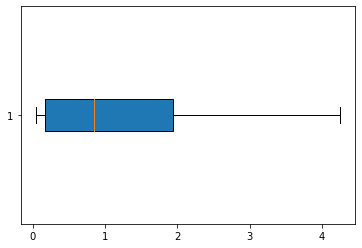

In [18]:
plt.boxplot(x, vert=False, patch_artist=True)

#### Эмпирическая функци распределения ####

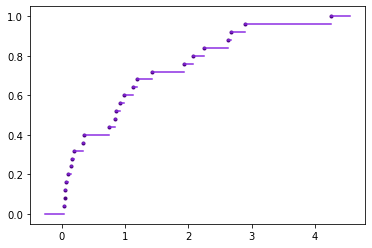

In [19]:
plt.scatter(sorted(x), [i / len(x) for i in range(1, 26)], marker = '.', color='indigo')
plt.plot([sorted(x)[0] - 0.3, sorted(x)[0]], [0, 0], color='blueviolet')
plt.plot([sorted(x)[-1], sorted(x)[-1] + 0.3], [1, 1], color='blueviolet')
for i in range(len(x) - 1):
    plt.plot(sorted(x)[i:i+2], [(i + 1) / len(x)] * 2, color='blueviolet')

#### Гистограмма ####

In [20]:
k = int(1 + np.log2(len(x)))

(array([0.61702188, 0.23731611, 0.14238966, 0.14238966, 0.04746322]),
 array([0.03819698, 0.88095478, 1.72371258, 2.56647038, 3.40922818,
        4.25198598]),
 <BarContainer object of 5 artists>)

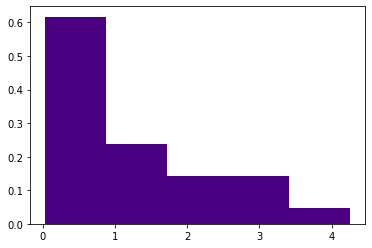

In [21]:
plt.hist(x, bins = int(k), color='indigo', weights=[1 / N / (max(x) - min(x)) * k]*len(x))

### Пункт c) ###

#### Ядерная оценка ####

In [22]:
def q(x, x0):
    return 0.75 * (1 - ((x - x0) / h)**2)

In [23]:
s = (1 / (N - 1) * np.sum([(x[i] - np.mean(x))**2 for i in range(len(x))]))**0.5
h = 2.344 * s / N**0.2
l = np.linspace(min(x) - h, max(x) + h, 10000)
y = np.zeros(len(l))
for i in range(len(x)):
    left = np.where(l >= (x[i] - h))[0][0]
    right = np.where(l <= (x[i] + h))[0][-1]
    y[left:right] += q(l[left:right], x[i])

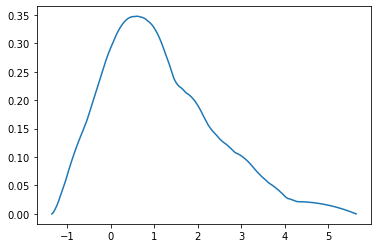

In [24]:
plt.plot(l, y / N / h)

### Пункт d) ###

#### Плотность распределения среднего арифметического элементов выборки и сравнение с бутстраповской оценкой плотности ####

In [29]:
def bootstrap(d, f, n):
    res = []
    for i in range(n):
        new_d = np.random.choice(d, len(d))
        res.append(f(new_d))
    g = list(np.histogram(res))
    g[0] = [g[0][i] / (g[1][i+1] - g[1][i]) / len(res) for i in range(len(g[0]))]
    plt.stairs(g[0], g[1], fill = 1)
    
def gaus(p):
    D = 1 / N * sum([(x[i] - np.mean(x))**2 for i in range(N)])
    return 1 / (2 * np.pi * D / N)**0.5 * np.exp(-(p - np.mean(x))**2 / 2 / D * N)

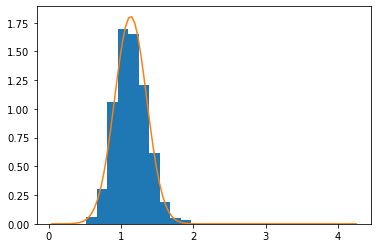

In [30]:
bootstrap(x, np.mean, 1000)
plt.plot(np.linspace(min(x), max(x), 100), [gaus(i) for i in np.linspace(min(x), max(x), 100)])

### Пункт e) ###

#### Бутстраповская оценка плотности распределения коэффициента асимметрии ####

In [31]:
def asymmetry(d):
    D = 1 / N * sum([(d[i] - np.mean(d))**2 for i in range(N)])
    S =  1 / N * sum([(d[i] - np.mean(d))**3 for i in range(N)])
    return S / D**1.5

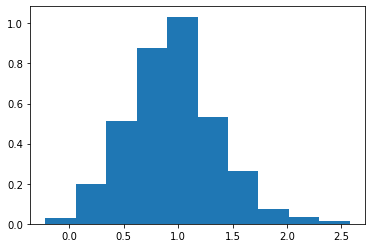

In [33]:
bootstrap(x, asymmetry, 1000)